In [35]:
# Import required libraries
import pandas as pd  # Data handling
import numpy as np  # Numerical operations
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.ensemble import RandomForestClassifier  # ML model
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Preprocessing
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns  # Styling plots

In [37]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of sample clients
n_samples = 500


In [39]:
# Generate synthetic financial client data
data = pd.DataFrame({
    "age": np.random.randint(25, 75, n_samples),  # Age between 25–75
    "net_worth": np.random.normal(500000, 200000, n_samples).astype(int),  # Net worth
    "portfolio_diversification": np.random.uniform(0.1, 1.0, n_samples),  # Diversification score
    "investment_experience_years": np.random.randint(0, 40, n_samples),  # Experience in years
    "portfolio_volatility": np.random.uniform(0.05, 0.5, n_samples),  # Volatility %
    "client_income": np.random.normal(100000, 30000, n_samples).astype(int),  # Annual income
})


In [41]:
# Define a function to assign risk level based on scoring rules
def assign_risk(row):
    # Calculate a weighted risk score
    score = (
        (1 - row['portfolio_diversification']) * 0.4 +
        row['portfolio_volatility'] * 0.4 +
        (1 - min(row['investment_experience_years'], 30)/30) * 0.2
    )
    # Classify risk level
    if score < 0.3:
        return "Low"
    elif score < 0.6:
        return "Medium"
    else:
        return "High"


In [43]:
# Apply the risk assignment to each row
data['risk_level'] = data.apply(assign_risk, axis=1)


In [45]:
# Separate input features and target variable
X = data.drop('risk_level', axis=1)  # Features
y = data['risk_level']  # Labels


In [47]:
# Encode string labels to numeric
le = LabelEncoder()
y_encoded = le.fit_transform(y)


In [49]:
# Scale features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [51]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded
)


In [53]:
# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
# Predict on test data
y_pred = model.predict(X_test)


In [57]:
# Print evaluation metrics
print("Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))


Report:
               precision    recall  f1-score   support

        High       1.00      0.50      0.67         4
         Low       0.92      0.97      0.94        35
      Medium       0.95      0.95      0.95        61

    accuracy                           0.94       100
   macro avg       0.96      0.81      0.85       100
weighted avg       0.94      0.94      0.94       100



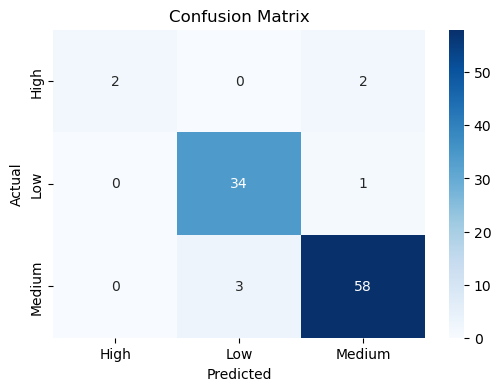

In [59]:
# Create confusion matrix (ADD THIS BEFORE PLOTTING)
conf_matrix = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


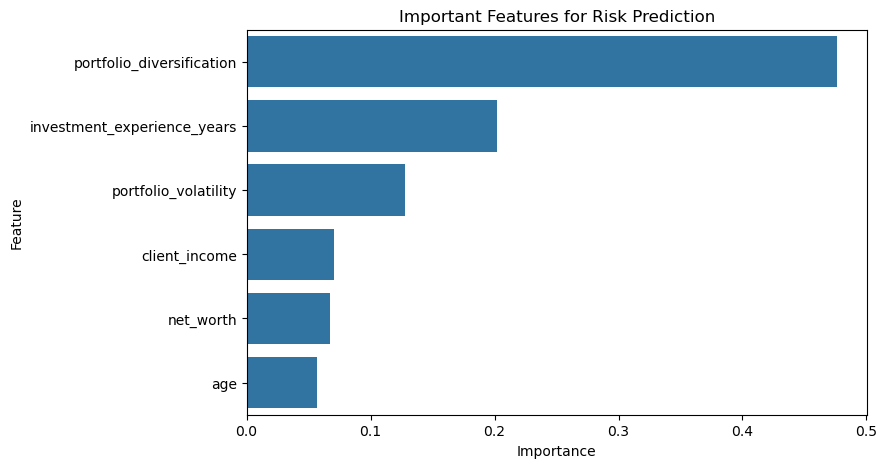

In [61]:
# Get feature importance scores (INSERT HERE)
importances = model.feature_importances_
features = X.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df, x='Importance', y='Feature')
plt.title("Important Features for Risk Prediction")
plt.show()